In [1]:
import pandas as pd
import numpy as np

train = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv('../input/titanic/test.csv')
gender_submission = pd.read_csv('../input/titanic/gender_submission.csv')

In [2]:
train.head(5)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [3]:
print(train.shape)
print(test.shape)
print(gender_submission.shape)

(891, 12)
(418, 11)
(418, 2)


In [4]:
print(train.columns)
print('-' * 10)
print(test.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
----------
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
df_full = pd.concat([train, test], axis=0, sort=False)
print(df_full.shape)
df_full.describe()

(1309, 12)


PassengerId    Survived       Pclass          Age        SibSp  \
count  1309.000000  891.000000  1309.000000  1046.000000  1309.000000   
mean    655.000000    0.383838     2.294882    29.881138     0.498854   
std     378.020061    0.486592     0.837836    14.413493     1.041658   
min       1.000000    0.000000     1.000000     0.170000     0.000000   
25%     328.000000    0.000000     2.000000    21.000000     0.000000   
50%     655.000000    0.000000     3.000000    28.000000     0.000000   
75%     982.000000    1.000000     3.000000    39.000000     1.000000   
max    1309.000000    1.000000     3.000000    80.000000     8.000000   

             Parch         Fare  
count  1309.000000  1308.000000  
mean      0.385027    33.295479  
std       0.865560    51.758668  
min       0.000000     0.000000  
25%       0.000000     7.895800  
50%       0.000000    14.454200  
75%       0.000000    31.275000  
max       9.000000   512.329200

In [11]:
df_full.describe(percentiles=[.1, .2, .3, .4, .5, .6, .7, .8, .9])

PassengerId    Survived       Pclass          Age        SibSp  \
count  1309.000000  891.000000  1309.000000  1046.000000  1309.000000   
mean    655.000000    0.383838     2.294882    29.881138     0.498854   
std     378.020061    0.486592     0.837836    14.413493     1.041658   
min       1.000000    0.000000     1.000000     0.170000     0.000000   
10%     131.800000    0.000000     1.000000    14.000000     0.000000   
20%     262.600000    0.000000     1.000000    19.000000     0.000000   
30%     393.400000    0.000000     2.000000    22.000000     0.000000   
40%     524.200000    0.000000     2.000000    25.000000     0.000000   
50%     655.000000    0.000000     3.000000    28.000000     0.000000   
60%     785.800000    0.000000     3.000000    31.000000     0.000000   
70%     916.600000    1.000000     3.000000    36.000000     1.000000   
80%    1047.400000    1.000000     3.000000    42.000000     1.000000   
90%    1178.200000    1.000000     3.000000    50.000000     1.000000   
max    1309.000000    1.000000     3.000000    80.000000     8.000000   

             Parch         Fare  
count  1309.000000  1308.000000  
mean      0.385027    33.295479  
std       0.865560    51.758668  
min       0.000000     0.000000  
10%       0.000000     7.567500  
20%       0.000000     7.854200  
30%       0.000000     8.050000  
40%       0.000000    10.500000  
50%       0.000000    14.454200  
60%       0.000000    21.679200  
70%       0.000000    26.955000  
80%       1.000000    41.579200  
90%       2.000000    78.050820  
max       9.000000   512.329200

In [12]:
df_full.describe(include='O')

Name   Sex    Ticket        Cabin Embarked
count                   1309  1309      1309          295     1307
unique                  1307     2       929          186        3
top     Connolly, Miss. Kate  male  CA. 2343  C23 C25 C27        S
freq                       2   843        11            6      914

In [13]:
import pandas_profiling as pdp
display(pdp.__version__)
pdp.ProfileReport(train)

'3.1.0'

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [14]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

!pip install japanize-matplotlib
import japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=0ab3e0f64f7670814d29e98c3e7c09ffacf452112e6d5ebe96f1dfe1f616c22c
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


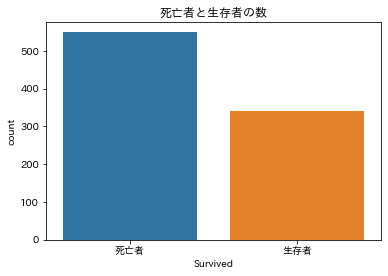

In [15]:
sns.countplot(x='Survived', data=train)
plt.title('死亡者と生存者の数')
plt.xticks([0,1],['死亡者', '生存者'])
plt.show()

In [16]:
display(train['Survived'].value_counts())
display(train['Survived'].value_counts() / len(train['Survived']))

0    549
1    342
Name: Survived, dtype: int64

0    0.616162
1    0.383838
Name: Survived, dtype: float64

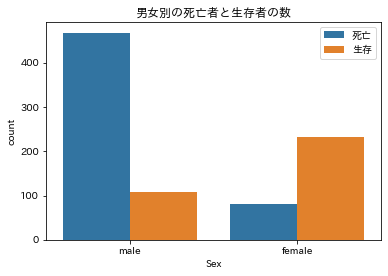

In [17]:
sns.countplot(x='Sex', hue='Survived', data=train)
plt.title('男女別の死亡者と生存者の数')
plt.legend(['死亡','生存'])
plt.show()

In [18]:
display(pd.crosstab(train['Sex'], train['Survived']))
display(pd.crosstab(train['Sex'], train['Survived'], normalize='index'))

Survived    0    1
Sex               
female     81  233
male      468  109

Survived         0         1
Sex                         
female    0.257962  0.742038
male      0.811092  0.188908

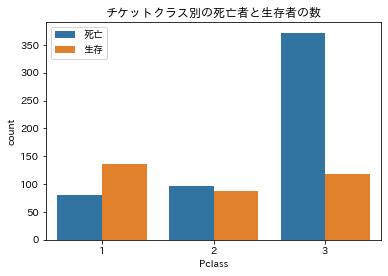

In [19]:
sns.countplot(x='Pclass', hue='Survived', data=train)
plt.title('チケットクラス別の死亡者と生存者の数')
plt.legend(['死亡','生存'])
plt.show()

In [20]:
display(pd.crosstab(train['Pclass'], train['Survived']))
display(pd.crosstab(train['Pclass'], train['Survived'], normalize='index'))

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119

Survived         0         1
Pclass                      
1         0.370370  0.629630
2         0.527174  0.472826
3         0.757637  0.242363

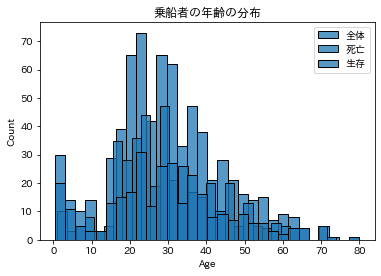

In [21]:
sns.histplot(train['Age'].dropna(), kde=False, bins=30 ,label='全体')
sns.histplot(train[train['Survived'] == 0].Age.dropna(), kde=False, bins=30, label='死亡')
sns.histplot(train[train['Survived'] == 1].Age.dropna(), kde=False, bins=30, label='生存')

plt.title('乗船者の年齢の分布')
plt.legend()


In [22]:
train['CategoricalAge'] = pd.cut(train['Age'], 8)
display(pd.crosstab(train['CategoricalAge'], train['Survived']))
display(pd.crosstab(train['CategoricalAge'], train['Survived'], normalize='index'))

Survived            0   1
CategoricalAge           
(0.34, 10.368]     26  38
(10.368, 20.315]   71  44
(20.315, 30.263]  146  84
(30.263, 40.21]    86  69
(40.21, 50.158]    53  33
(50.158, 60.105]   25  17
(60.105, 70.052]   13   4
(70.052, 80.0]      4   1

Survived                 0         1
CategoricalAge                      
(0.34, 10.368]    0.406250  0.593750
(10.368, 20.315]  0.617391  0.382609
(20.315, 30.263]  0.634783  0.365217
(30.263, 40.21]   0.554839  0.445161
(40.21, 50.158]   0.616279  0.383721
(50.158, 60.105]  0.595238  0.404762
(60.105, 70.052]  0.764706  0.235294
(70.052, 80.0]    0.800000  0.200000

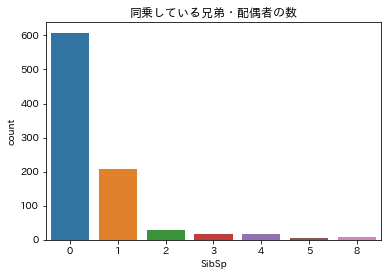

In [23]:
sns.countplot(x='SibSp', data = train)
plt.title('同乗している兄弟・配偶者の数');

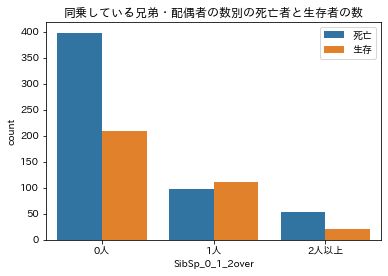

In [24]:
train['SibSp_0_1_2over'] = [i if i <=1 else 2 for i in train['SibSp']]
sns.countplot(x='SibSp_0_1_2over', hue='Survived', data=train)
plt.legend(['死亡', '生存'])
plt.xticks([0,1,2], ['0人', '1人', '2人以上'])
plt.title('同乗している兄弟・配偶者の数別の死亡者と生存者の数')
plt.show()

In [25]:
display(pd.crosstab(train['SibSp_0_1_2over'], train['Survived']))
display(pd.crosstab(train['SibSp_0_1_2over'], train['Survived'], normalize='index'))

Survived           0    1
SibSp_0_1_2over          
0                398  210
1                 97  112
2                 54   20

Survived                0         1
SibSp_0_1_2over                    
0                0.654605  0.345395
1                0.464115  0.535885
2                0.729730  0.270270

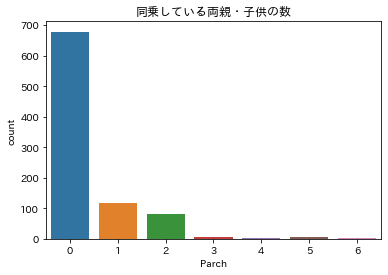

In [26]:
sns.countplot(x='Parch', data = train)
plt.title('同乗している両親・子供の数');

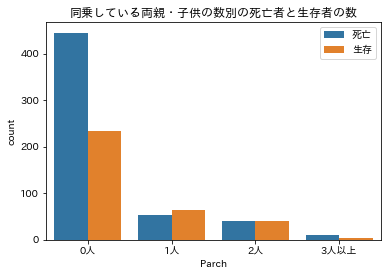

In [27]:
train['Parch_0_1_2_3over'] = [i if i <=2 else 3 for i in train['Parch']]
sns.countplot(x='Parch_0_1_2_3over',hue='Survived', data = train)
plt.title('同乗している両親・子供の数別の死亡者と生存者の数')
plt.legend(['死亡','生存'])
plt.xticks([0, 1, 2, 3], ['0人', '1人', '2人', '3人以上'])
plt.xlabel('Parch')
plt.show()

In [28]:
display(pd.crosstab(train['Parch_0_1_2_3over'], train['Survived']))
display(pd.crosstab(train['Parch_0_1_2_3over'], train['Survived'], normalize='index'))

Survived             0    1
Parch_0_1_2_3over          
0                  445  233
1                   53   65
2                   40   40
3                   11    4

Survived                  0         1
Parch_0_1_2_3over                    
0                  0.656342  0.343658
1                  0.449153  0.550847
2                  0.500000  0.500000
3                  0.733333  0.266667

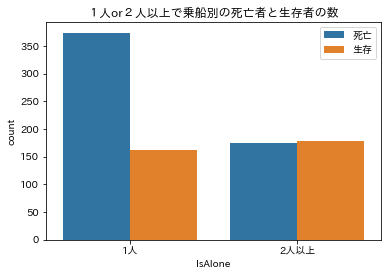

In [29]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1

train['IsAlone'] = 0
train.loc[train['FamilySize'] >= 2, 'IsAlone'] = 1

sns.countplot(x='IsAlone', hue = 'Survived', data = train)
plt.xticks([0, 1], ['1人', '2人以上'])

plt.legend(['死亡', '生存'])
plt.title('１人or２人以上で乗船別の死亡者と生存者の数')
plt.show()

In [30]:
display(pd.crosstab(train['IsAlone'], train['Survived']))
display(pd.crosstab(train['IsAlone'], train['Survived'], normalize='index'))

Survived    0    1
IsAlone           
0         374  163
1         175  179

Survived         0         1
IsAlone                     
0         0.696462  0.303538
1         0.494350  0.505650

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


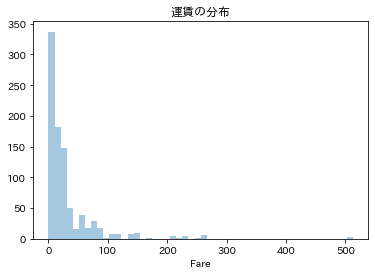

In [31]:
sns.distplot(train['Fare'].dropna(), kde=False, hist=True)
plt.title('運賃の分布');

In [32]:
train['CategoricalFare'] = pd.qcut(train['Fare'], 4)
train[['CategoricalFare', 'Survived']].groupby(['CategoricalFare'], as_index=False).mean()

display(pd.crosstab(train['CategoricalFare'], train['Survived']))
display(pd.crosstab(train['CategoricalFare'], train['Survived'], normalize='index'))

Survived           0    1
CategoricalFare          
(-0.001, 7.91]   179   44
(7.91, 14.454]   156   68
(14.454, 31.0]   121  101
(31.0, 512.329]   93  129

Survived                0         1
CategoricalFare                    
(-0.001, 7.91]   0.802691  0.197309
(7.91, 14.454]   0.696429  0.303571
(14.454, 31.0]   0.545045  0.454955
(31.0, 512.329]  0.418919  0.581081

In [33]:
train['Name'][0:5]

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [34]:
set(train.Name.str.extract(' ([A-Za-z]+)\.', expand=False))

{'Capt',
 'Col',
 'Countess',
 'Don',
 'Dr',
 'Jonkheer',
 'Lady',
 'Major',
 'Master',
 'Miss',
 'Mlle',
 'Mme',
 'Mr',
 'Mrs',
 'Ms',
 'Rev',
 'Sir'}

In [35]:
train.Name.str.extract(' ([A-Za-z]+)\.', expand=False).value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Name, dtype: int64

In [36]:
train['Title'] = train.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
train.groupby('Title').mean()['Age']

Title
Capt        70.000000
Col         58.000000
Countess    33.000000
Don         40.000000
Dr          42.000000
Jonkheer    38.000000
Lady        48.000000
Major       48.500000
Master       4.574167
Miss        21.773973
Mlle        24.000000
Mme         24.000000
Mr          32.368090
Mrs         35.898148
Ms          28.000000
Rev         43.166667
Sir         49.000000
Name: Age, dtype: float64